In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
rc('axes', unicode_minus=False)

import seaborn as sns 

In [2]:
data_all = pd.read_csv('data/과전류샘플데이터.csv')
data_all[:6]

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도,접촉예측,Trip시간
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,1.598,8.186,0.0473,34.17,95
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,1.396,8.145,0.0299,31.62,95
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,1.552,8.157,0.0369,34.39,106
3,107,0.087,0.765,225,1.83,312,1.65,1.0107,0.852,1.437,8.435,0.0449,30.69,84
4,93,0.085,0.737,221,2.08,299,1.83,1.0552,0.822,1.408,8.247,0.0476,29.67,91
5,109,0.112,0.735,206,1.79,298,1.58,1.1469,0.847,1.763,8.234,0.0477,37.98,103


In [3]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
S하중         86 non-null int64
S저항         86 non-null float64
T저항         86 non-null float64
M하중         86 non-null int64
M_stroke    86 non-null float64
C하중         86 non-null int64
C_stroke    86 non-null float64
C저항         86 non-null float64
저항합         86 non-null float64
Gap         86 non-null float64
초기위치        86 non-null float64
이동속도        86 non-null float64
접촉예측        86 non-null float64
Trip시간      86 non-null int64
dtypes: float64(10), int64(4)
memory usage: 9.5 KB


In [4]:
X = data_all.drop(['Trip시간', '접촉예측'], axis=1)
X[:3]

,S하중,S저항,T저항,M하중,M_stroke,C하중,C_stroke,C저항,저항합,Gap,초기위치,이동속도
0,123,0.084,0.756,218,1.95,323,1.70,1.0613,0.840,1.598,8.186,0.0473
1,103,0.083,0.785,216,1.96,298,1.73,1.0578,0.868,1.396,8.145,0.0299
2,104,0.092,0.735,218,1.85,298,1.59,1.1678,0.827,1.552,8.157,0.0369


In [5]:
y = data_all['Trip시간']
y[:3]

0     95
1     95
2    106
Name: Trip시간, dtype: int64

In [6]:
import seaborn as sns 

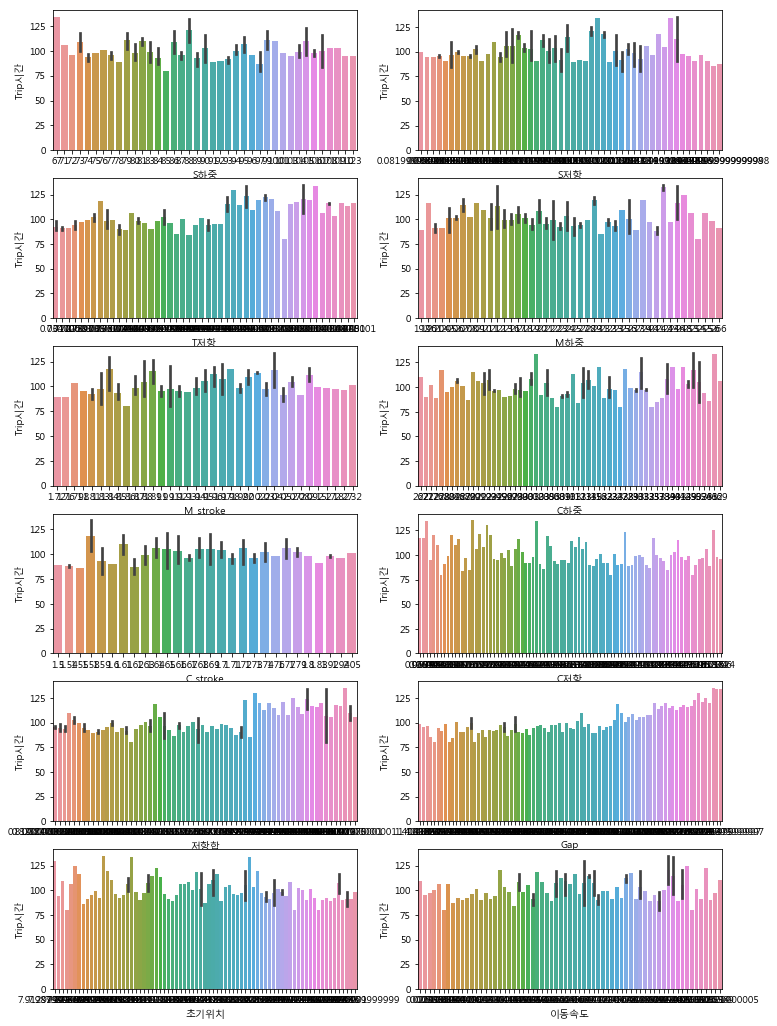

In [7]:
figure, ((ax1, ax2), 
         (ax3, ax4), 
         (ax5, ax6),
         (ax7, ax8), 
         (ax9, ax10),
         (ax11, ax12)) = plt.subplots(nrows=6, ncols=2)
figure.set_size_inches(12, 18)

sns.barplot(data=data_all, x="S하중", y="Trip시간", ax=ax1)
sns.barplot(data=data_all, x="S저항", y="Trip시간", ax=ax2)
sns.barplot(data=data_all, x="T저항", y="Trip시간", ax=ax3)
sns.barplot(data=data_all, x="M하중", y="Trip시간", ax=ax4)
sns.barplot(data=data_all, x="M_stroke", y="Trip시간", ax=ax5)
sns.barplot(data=data_all, x="C하중", y="Trip시간", ax=ax6)
sns.barplot(data=data_all, x="C_stroke", y="Trip시간", ax=ax7)
sns.barplot(data=data_all, x="C저항", y="Trip시간", ax=ax8)
sns.barplot(data=data_all, x="저항합", y="Trip시간", ax=ax9)
sns.barplot(data=data_all, x="Gap", y="Trip시간", ax=ax10)
sns.barplot(data=data_all, x="초기위치", y="Trip시간", ax=ax11)
sns.barplot(data=data_all, x="이동속도", y="Trip시간", ax=ax12)



In [ ]:
sns.pairplot(data_all.drop('접촉예측', axis=1))

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(data=data_all.drop('접촉예측', axis=1).corr(), annot=True, fmt='.2f', cmap='Blues')

In [9]:
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 랜덤 포레스트

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc = RandomForestRegressor(n_estimators=300)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

## ##

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(rfc, X_train, y_train, cv=5).mean()

#### columns 명 바꾸는 방법??

In [ ]:
pred = pd.DataFrame(y_test)
pred[:5]

In [ ]:
pred['y_RF'] =rfc.predict(X_test)
pred[:5]

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=pred)

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=pred, x='Trip시간', y='y_RF')

In [ ]:
pred['diff'] = abs(pred['Trip시간']-pred['y_RF'])

In [ ]:
diff_max = pred['diff'].max()
diff_mean = pred['diff'].mean()
print(f'최대 : {diff_max:.3f}')
print(f'평균 : {diff_mean:.3f}')

In [ ]:
pred[['diff']].describe()

## SVM

In [ ]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(kernel="linear")
# , C=float("inf")
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

In [ ]:
cross_val_score(svr, X_train, y_train, cv=5).mean()

## 선형

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
linr = LinearRegression()
linr.fit(X_train, y_train)
linr.score(X_test, y_test)

In [ ]:
cross_val_score(linr, X_train, y_train, cv=5).mean()

In [ ]:
pred['y_svr'] = svr.predict(X_test)
pred['y_linr'] = linr.predict(X_test)

pred[:5]

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(data=pred.drop('diff', axis=1))

### 스케일링

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)
# y_sc = scaler.fit_transform(y.values.reshape(-1,1)).ravel()

# y도 스케일링이 필요한가?? => ㄴㄴ y는 독립이므로 안해도됨

In [ ]:
pd.DataFrame(X_sc[:3].round(4), columns=X.columns)

In [ ]:
np.random.seed(7)
X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2)

In [ ]:
## RF

In [ ]:
rfc_sc = RandomForestRegressor(n_estimators=300)
rfc_sc.fit(X_sc_train, y_train)
rfc_sc.score(X_sc_test, y_test)

In [ ]:
cross_val_score(rfc_sc, X_sc_train, y_train, cv=5).mean()

In [ ]:
## SVM

In [ ]:
svr_sc = SVR(kernel="linear")
svr_sc.fit(X_sc_train, y_train)
svr_sc.score(X_sc_test, y_test)

In [ ]:
cross_val_score(svr_sc, X_sc_train, y_train, cv=5).mean()

In [ ]:
## Linear

In [ ]:
linr_sc = LinearRegression()
linr_sc.fit(X_sc_train, y_train)
linr_sc.score(X_sc_test, y_test)

In [ ]:
cross_val_score(linr_sc, X_sc_train, y_train, cv=5).mean()

In [ ]:
pred_sc = pd.DataFrame(y_test)

In [ ]:
pred_sc['y_rfc_sc'] = rfc_sc.predict(X_sc_test)
pred_sc['y_svr_sc'] = svr_sc.predict(X_sc_test)
pred_sc['y_linr_sc'] = linr_sc.predict(X_sc_test)
pred_sc[:5]

In [ ]:
print(abs(pred_sc['Trip시간'] - pred_sc['y_rfc_sc']).max())
print(abs(pred_sc['Trip시간'] - pred_sc['y_svr_sc']).max())
print(abs(pred_sc['Trip시간'] - pred_sc['y_linr_sc']).max())

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(data=pred_sc)

In [16]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.02)

In [17]:
X_train.shape, y_train.shape

((84, 12), (84,))

In [18]:
X_test.shape, y_test.shape

((2, 12), (2,))

In [19]:
rfr = RandomForestRegressor(n_estimators=300)
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

-9.40329444444443

In [21]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(rfr, X_train, y_train, cv=50).mean()

D:\anaconda3\envs\study_env1\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\anaconda3\envs\study_env1\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\anaconda3\envs\study_env1\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\anaconda3\envs\study_env1\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
D:\anaconda3\envs\study_env1\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.


nan